<a href="https://colab.research.google.com/github/eshreyareddy/Clustering/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DBSCAN**

**Introduction :**

The DBSCAN stands for density based spatial clustering of applications with noise.

It was introduced around 1996 and has gained significant popularity in the community due to its effective clustering ability of recognizing different types of clustering shapes and also the ability to identify the clusters correctly even in the presence of noise.

**Epsilon(ɛ) :** It is the distance or radius around each object.

**Min Points:** MinPoints are the number of points that must exist within ɛ distance from the point.

**Core Point:** Considering below diagram, one circle is drawn whose center is the Query point and radius is ɛ. The query point will become Core point if number of points inside circle is more than MinPoints (in this case MinPoints = 2). So the query point has qualified to become Core point.

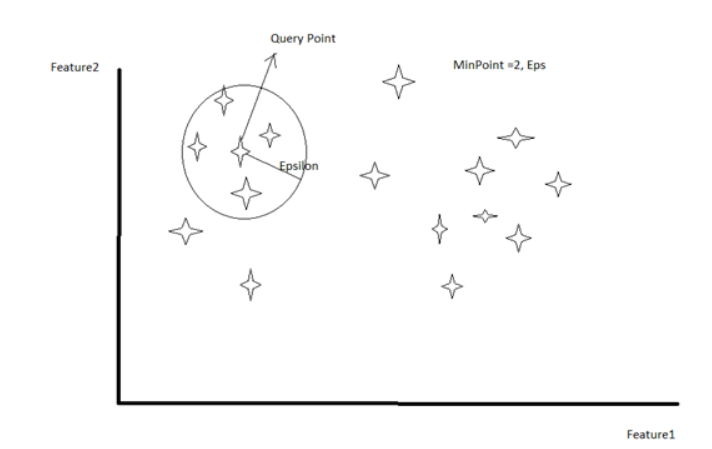



**Border Point**:If a query point has lesser than MinPoints within ɛ but has a core point within ɛ distance, then it is a Border point.

**Noise Point**: A point which is neither a Core nor a Border point is called as Noise point. See below diagram.


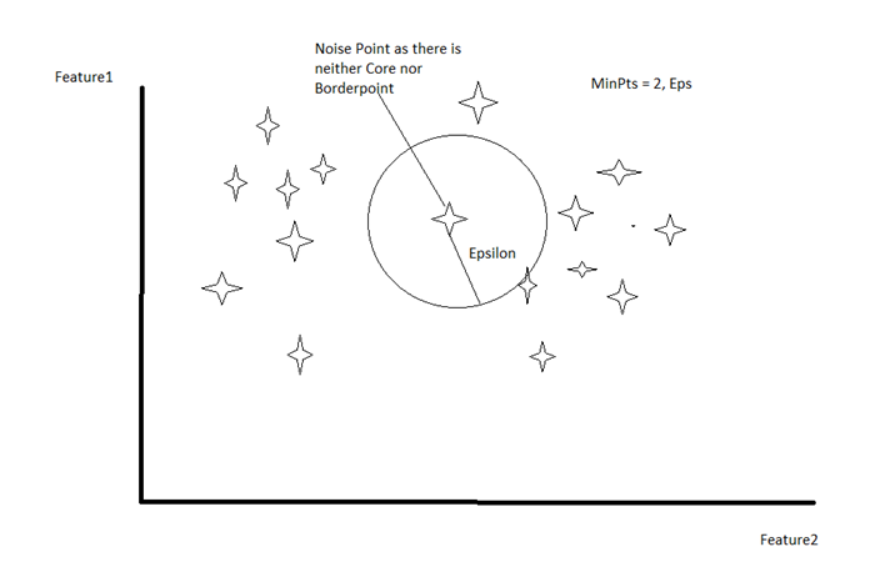


The DBSCAN will process each and every object/points in this fashion and at the end it will obtain categorization of all the points as either core, border or noise points.

Once the categorization of the points are obtained, the next step is to use them to construct the clusters. DBSCAN take up a core point and then look at the points which are inside its Epsilon radius circle and assign a Cluster label to those points.

So the key idea is to give the same label to all the points inside the circle of a core point.

Multiple iterations will be run for different core points to assign Cluster label, please note algorithm will not assign new Cluster label to those points which have already be considered in earlier iteration.



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as  plt
import seaborn as sns


from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
from google.colab import files

uploaded = files.upload()

Saving Cuisine_rating.csv to Cuisine_rating.csv


In [5]:

df=pd.read_csv('Cuisine_rating.csv')


df.head(5)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [7]:
data = df.iloc[:, [3, 4]].values




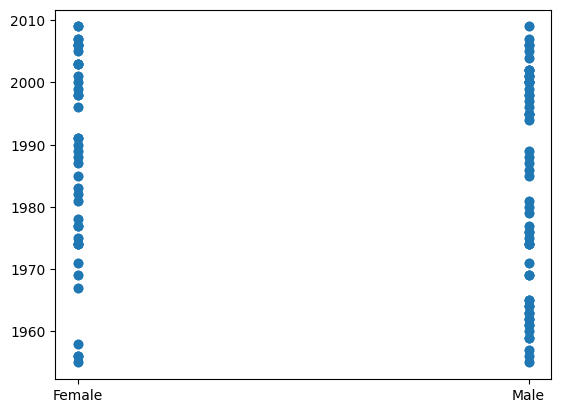

In [8]:
# visualizing the dataset
plt.scatter(data[:, 0], data[:, 1])

In [12]:
# Displaying the column names of the DataFrame
df.columns.tolist()


['User ID',
 'Area code',
 'Location',
 'Gender',
 'YOB',
 'Marital Status',
 'Activity',
 'Budget',
 'Cuisines',
 'Alcohol ',
 'Smoker',
 'Food Rating',
 'Service Rating',
 'Overall Rating',
 'Often A S']

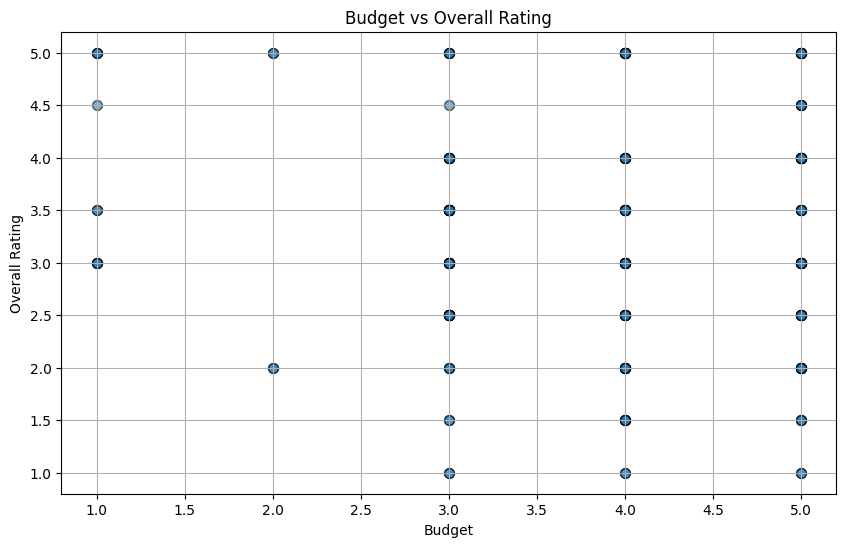

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'file_path' with the actual path to your CSV file)
file_path = 'Cuisine_rating.csv'
df_new = pd.read_csv(file_path)

# Selecting columns for the scatter plot
x_new = df_new['Budget']
y_new = df_new['Overall Rating']

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_new, y_new, alpha=0.6, edgecolor='black', s=50)
plt.title('Budget vs Overall Rating')
plt.xlabel('Budget')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()



In [25]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np

# Convert the NumPy array to a DataFrame
df = pd.DataFrame(data)

# Identify categorical columns (non-numeric) and convert them using one-hot encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(df, columns=categorical_cols)

# Now apply DBSCAN
dbscan = DBSCAN(eps=3, min_samples=4)
labels = dbscan.fit_predict(df.values)

# Output unique labels
np.unique(labels)








<ipython-input-25-6712061993e8>:10: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=categorical_cols)


array([0])

In [26]:

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [27]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 0


# Plotting graph - DBScan#

**Method-1**

Unique labels (clusters) identified by DBSCAN after adjustment: [-1  0  1  2  3  4  5  6]


<ipython-input-36-1d6e51965c01>:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(numeric_data[labels == label, 0], numeric_data[labels == label, 1], s = 10, c = color, label=f'Cluster {label}')


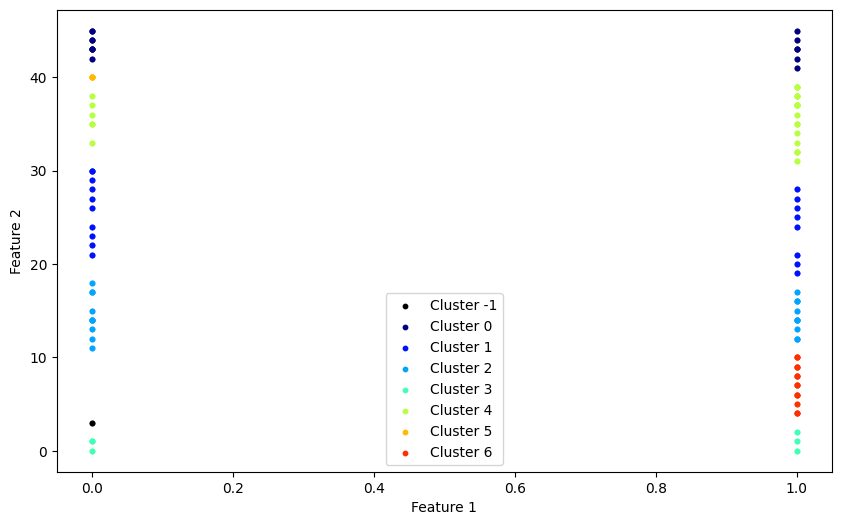

In [36]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

# Convert the NumPy array to a DataFrame for easier processing
df = pd.DataFrame(data)

# Apply label encoding to all categorical columns (e.g., 'Gender')
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object', 'category']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Convert the DataFrame back to a NumPy array
numeric_data = df.values

# Apply DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
labels = dbscan.fit_predict(numeric_data)

# Check unique labels after adjustment
unique_labels = np.unique(labels)
print("Unique labels (clusters) identified by DBSCAN after adjustment:", unique_labels)

# Visualization
plt.figure(figsize=(10, 6))
for label in unique_labels:
    if label == -1:
        color = 'black'  # Noise points
    else:
        color = plt.cm.jet(float(label) / np.max(labels + 1))
    plt.scatter(numeric_data[labels == label, 0], numeric_data[labels == label, 1], s = 10, c = color, label=f'Cluster {label}')

plt.xlabel('Feature 1')  # Replace with actual feature name
plt.ylabel('Feature 2')  # Replace with actual feature name
plt.legend()
plt.show()


**Method 2**

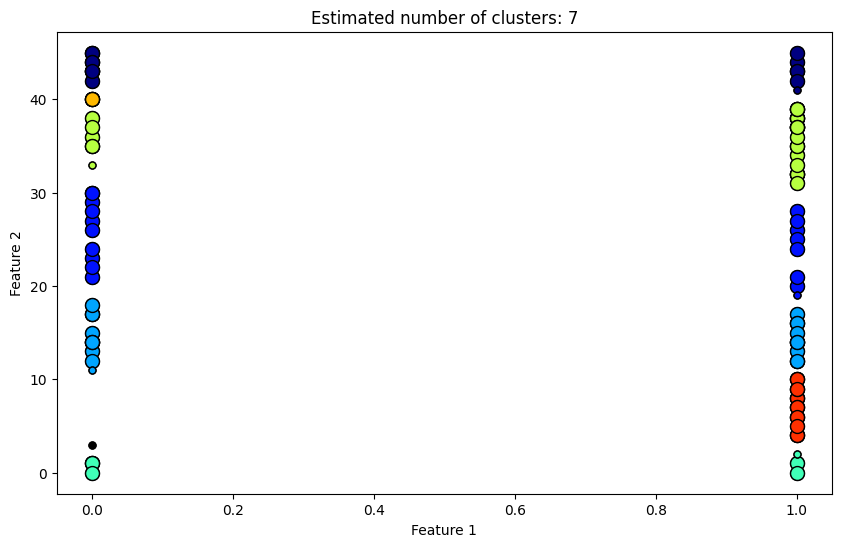

In [35]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Convert the NumPy array to a DataFrame for easier processing
df = pd.DataFrame(data)

# Apply label encoding to all categorical columns
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object', 'category']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Convert the DataFrame back to a NumPy array for DBSCAN
numeric_data = df.values

# Apply DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
labels = dbscan.fit_predict(numeric_data)

# Create a mask for core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plotting
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
for k in unique_labels:
    col = 'k' if k == -1 else plt.cm.jet(float(k) / n_clusters_)
    class_member_mask = (labels == k)

    # Plot core samples
    xy = numeric_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)

    # Plot non-core samples (edge points)
    xy = numeric_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=5)

plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.xlabel('Feature 1')  # Replace with actual feature name
plt.ylabel('Feature 2')  # Replace with actual feature name
plt.show()



**Conclusion:**

As clustering is unsupervised learning, you need to analyze each cluster and have a definition with respect to business data because Clustering is always guided by some business rules. Once your clusters are close to business rules, your model will make sense.

We can also change the value for eps and Min_sample to tune the model and make clusters better in shapes.
